In [2]:
# Example of creating and reading an h5py file
import io
import h5py
from numpy import *
import matplotlib.pyplot as plt

bio = io.BytesIO()
with h5py.File(bio) as f:
    f['dataset'] = range(10)

data = bio.getvalue() # data is a regular Python bytes object.
print("Total size:", len(data))
print("First bytes:", data[:10])

# Create local files
f1 = h5py.File('000018298-AWGRamanStabReadout.h5', 'r')
f2 = h5py.File('000018299-AWGRamanStabReadout.h5', 'r')
print(list(f1.keys()))
dset = f1['datasets']
print(dset)



Total size: 1480
First bytes: b'\x89HDF\r\n\x1a\n\x00\x00'
['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']
<HDF5 group "/datasets" (20 members)>


In [3]:
f1.keys()

<KeysViewHDF5 ['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']>

In [4]:
f1['datasets']

<HDF5 group "/datasets" (20 members)>

In [5]:
dset.keys()

<KeysViewHDF5 ['data.raman_awg.active_pmts', 'data.raman_awg.avg_parity', 'data.raman_awg.avg_thresh', 'data.raman_awg.dummy_active_pmts', 'data.raman_awg.error_bars_bottom', 'data.raman_awg.error_bars_top', 'data.raman_awg.fit_x', 'data.raman_awg.fit_y', 'data.raman_awg.parity_error_bars', 'data.raman_awg.raw_counts', 'data.raman_awg.x_values', 'global.Raman.Piezos.Ind_FinalX', 'monitor.calib_avg_thresh', 'monitor.calib_avg_tlock_feedback', 'monitor.calib_avg_xlock_feedback', 'monitor.calib_raw_counts', 'monitor.calib_tlock_feedback', 'monitor.calib_xlock_feedback', 'monitor.dopplercooling', 'monitor.sscooling']>

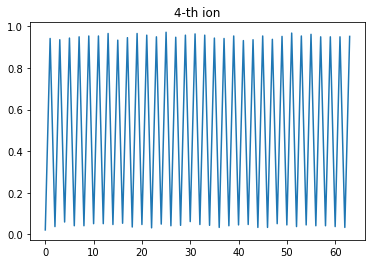

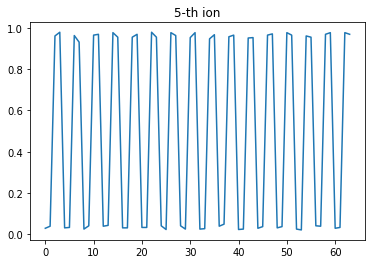

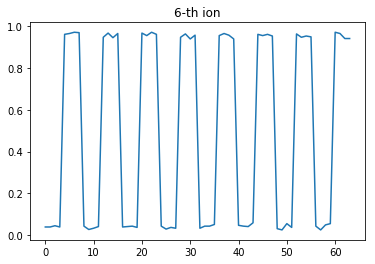

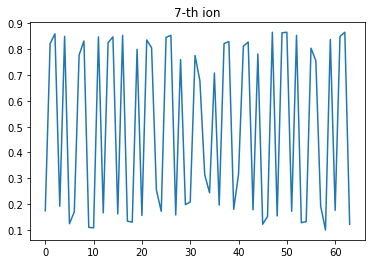

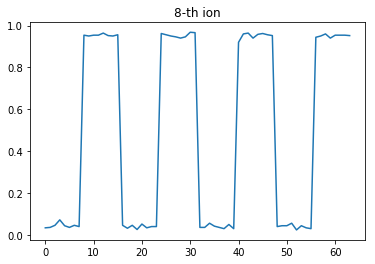

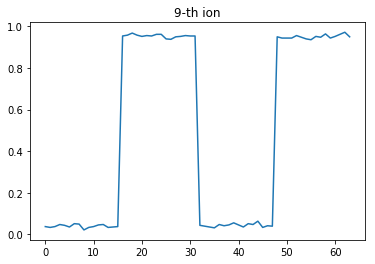

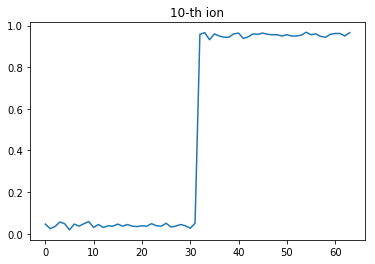

In [6]:
dset1 = h5py.File('000018298-AWGRamanStabReadout.h5', 'r')['datasets']
dset2 = h5py.File('000018299-AWGRamanStabReadout.h5', 'r')['datasets']

allDatY1 = array(dset1['data.raman_awg.avg_thresh'])
datX1 = array(dset1['data.raman_awg.x_values'])

allDatY2 = array(dset2['data.raman_awg.avg_thresh'])
datX2 = array(dset2['data.raman_awg.x_values'])

exp_data = concatenate((allDatY1, allDatY2), axis=1)


for i in range(4,11):
    plt.figure(i)
    plt.title(f'{i}-th ion')
    plt.plot(exp_data[i])

Number of data = 64
Average fidelity = 0.9538437499999999
Max fidelity minus Min fidelity = 0.04599999999999993
Variance = 9.19130859374999e-05
Number of data = 64
Average fidelity = 0.9667187500000001
Max fidelity minus Min fidelity = 0.04799999999999993
Variance = 8.604589843750002e-05
Number of data = 64
Average fidelity = 0.95740625
Max fidelity minus Min fidelity = 0.03600000000000003
Variance = 8.283496093750014e-05
Number of data = 64
Average fidelity = 0.9560312499999999
Max fidelity minus Min fidelity = 0.05599999999999994
Variance = 0.00010056152343749996
Number of data = 64
Average fidelity = 0.9551874999999999
Max fidelity minus Min fidelity = 0.04200000000000004
Variance = 7.683984375000006e-05
Number of data = 64
Average fidelity = 0.957625
Max fidelity minus Min fidelity = 0.04999999999999993
Variance = 8.335937500000006e-05
Number of data = 64
Average fidelity = 0.82384375
Max fidelity minus Min fidelity = 0.22199999999999998
Variance = 0.0023565380859374998


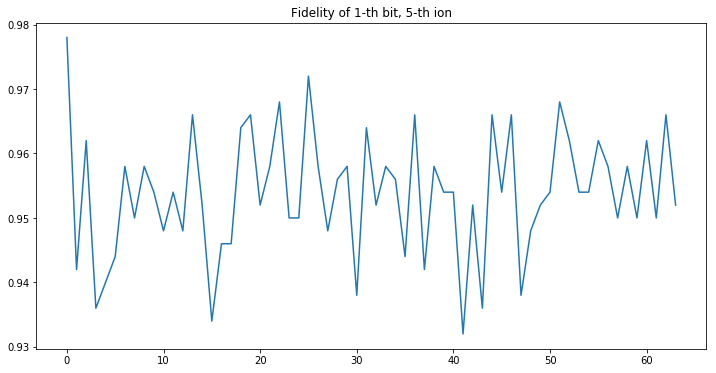

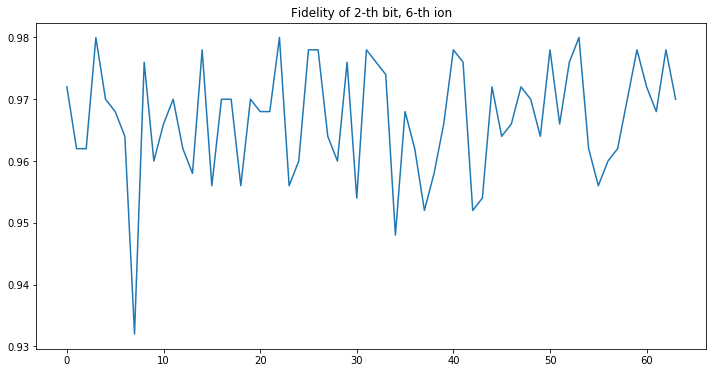

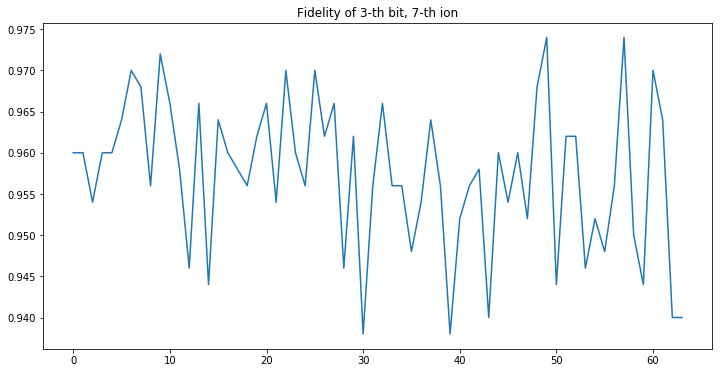

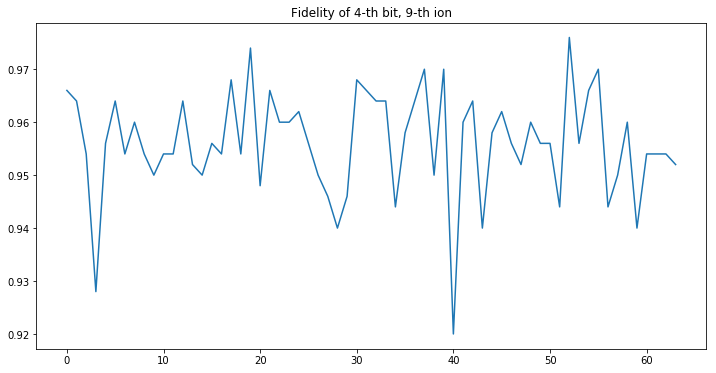

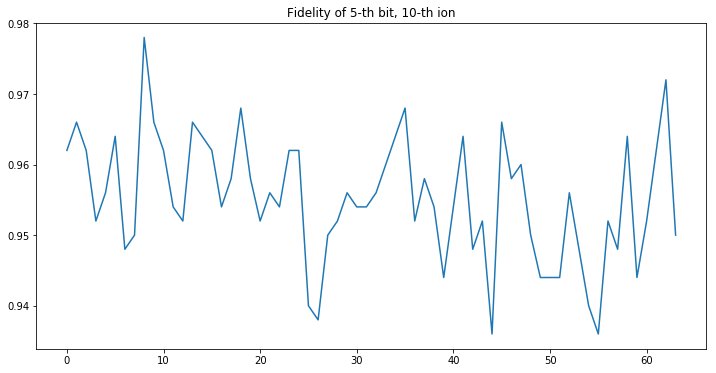

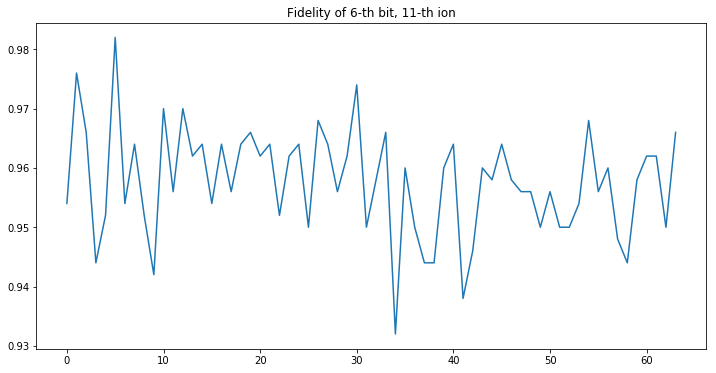

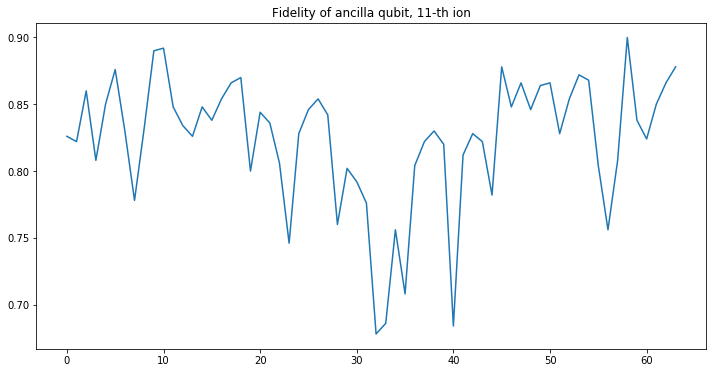

In [8]:
# Fidelity plots for all qubits (data and ancilla)
from Circuit_ops import int_to_bit_str, bit_str_to_int

N = 7

def stat_analysis(results):
    print(f"Number of data = {len(results)}")
    print(f"Average fidelity = {sum(results) / len(results)}")
    print(f"Max fidelity minus Min fidelity = {max(results) - min(results)}")
    print(f"Variance = {var(results)}")

for j in range(4, 7):
    results = zeros([2 ** (N - 1)])
    for i in range(2 ** (N-1)):
        index = int_to_bit_str(i, N-1)[N - j + 2]
        results[i] = exp_data[j][i] if index == 1 else 1 - exp_data[j][i]
#         results.append(exp_data[j][i])
    plt.figure(figsize=(12,6))
    plt.title(f'Fidelity of {j - 3}-th bit, {j + 1}-th ion')
    plt.plot(results)
    stat_analysis(results)
    

for j in range(8, 11):
    results = zeros([2 ** (N - 1)])
    for i in range(2 ** (N-1)):
        index = int_to_bit_str(i, N-1)[N - j + 3]
        results[i] = exp_data[j][i] if index == 1 else 1 - exp_data[j][i]
    plt.figure(figsize=(12,6))
    plt.title(f'Fidelity of {j - 4}-th bit, {j + 1}-th ion')
    plt.plot(results)
    stat_analysis(results)

results = zeros([2 ** (N - 1)])
for i in range(2 ** (N-1)):
    index = sum(int_to_bit_str(i, N-1)) % 2
    results[i] = exp_data[7][i] if index == 1 else 1 - exp_data[7][i]
plt.figure(figsize=(12,6))
plt.title(f'Fidelity of ancilla qubit, {j + 1}-th ion')
plt.plot(results)
stat_analysis(results)

plt.show()

Number of data = 64
Average fidelity = 0.82384375
Max fidelity minus Min fidelity = 0.22199999999999998
Variance = 0.0023565380859374998


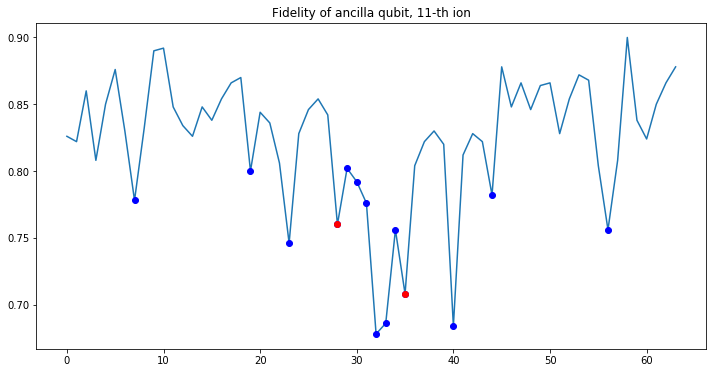

In [71]:
results = zeros([2 ** (N - 1)])

for i in range(2 ** (N-1)):
    index = sum(int_to_bit_str(i, N-1)) % 2
    results[i] = exp_data[7][i] if index == 1 else 1 - exp_data[7][i]
    
plt.figure(figsize=(12,6))
plt.title(f'Fidelity of ancilla qubit, {j + 1}-th ion')
plt.plot(results)
stat_analysis(results)

mins = [x for x in argsort(results)[:13] if x < 32]
mins += [63 - x for x in mins]
plt.plot(mins, [results[x] for x in mins], 'bo')

mins1 = [28, 63 - 28]
plt.plot(mins1, [results[x] for x in mins1], 'ro')
plt.show()

In [73]:
filtered_list = [x for x in argsort(results)[:13] if x < 32]
filtered_list.sort()
filtered_list

[7, 19, 23, 28, 30, 31]

In [61]:
average(results)

0.82384375

In [75]:
results

array([0.826, 0.822, 0.86 , 0.808, 0.85 , 0.876, 0.83 , 0.778, 0.832,
       0.89 , 0.892, 0.848, 0.834, 0.826, 0.848, 0.838, 0.854, 0.866,
       0.87 , 0.8  , 0.844, 0.836, 0.806, 0.746, 0.828, 0.846, 0.854,
       0.842, 0.76 , 0.802, 0.792, 0.776, 0.678, 0.686, 0.756, 0.708,
       0.804, 0.822, 0.83 , 0.82 , 0.684, 0.812, 0.828, 0.822, 0.782,
       0.878, 0.848, 0.866, 0.846, 0.864, 0.866, 0.828, 0.854, 0.872,
       0.868, 0.804, 0.756, 0.808, 0.9  , 0.838, 0.824, 0.85 , 0.866,
       0.878])